<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-28 12:04:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.2MB/s    in 3.3s    

2025-06-28 12:04:38 (60.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


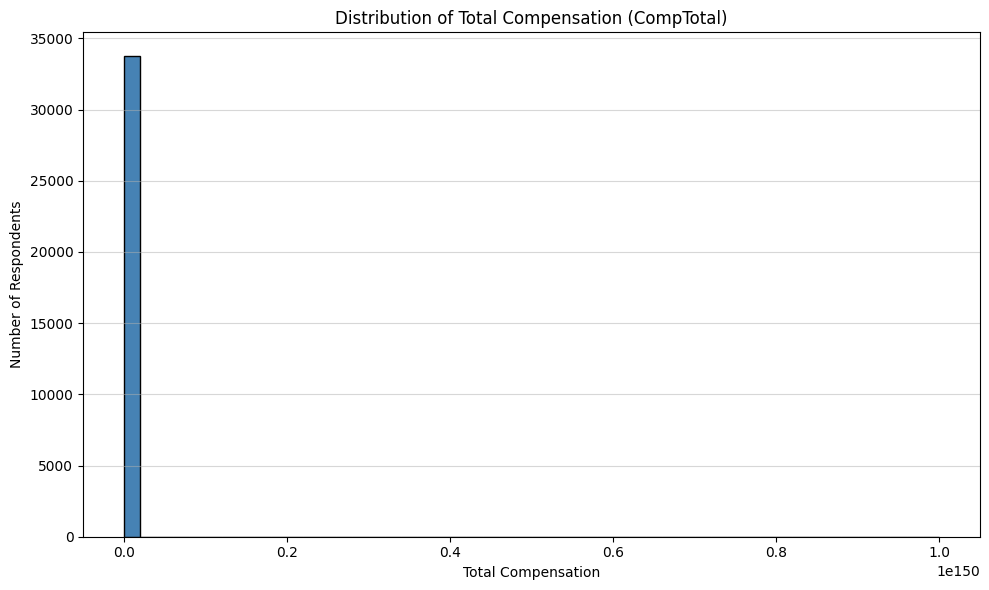

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query to get CompTotal values (ignoring NULLs)
query = """
SELECT CompTotal FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


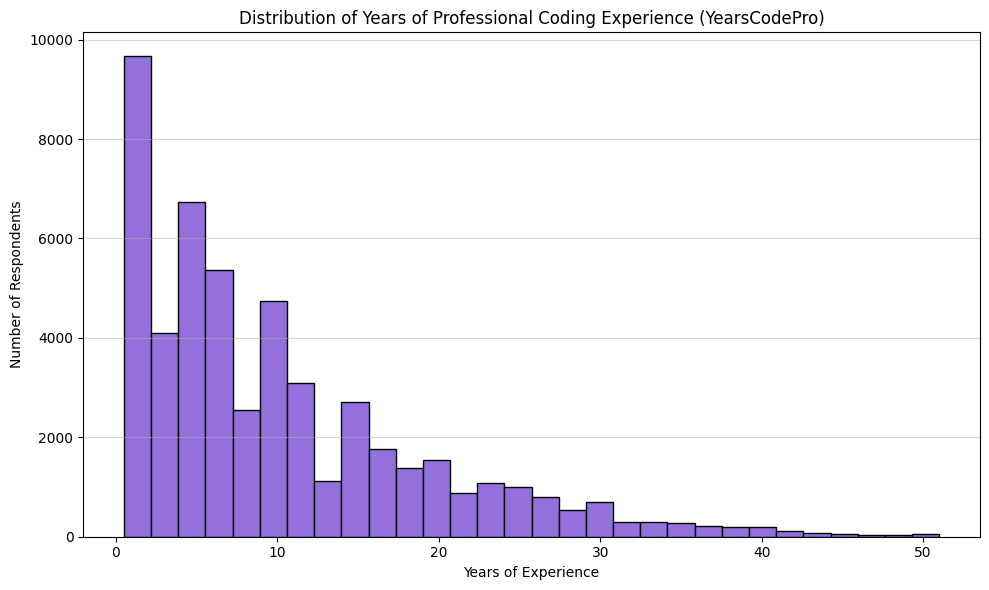

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load YearsCodePro column, remove NULLs and convert to numeric (if needed)
query = """
SELECT YearsCodePro FROM main
WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Convert strings to numeric (e.g., "More than 50 years" → 51, "Less than 1 year" → 0.5)
def convert_experience(val):
    if val == 'More than 50 years':
        return 51
    elif val == 'Less than 1 year':
        return 0.5
    try:
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Step 4: Drop any values that couldn't be converted
df = df[df['YearsCodePro'].notnull()]

# Step 5: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=30, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


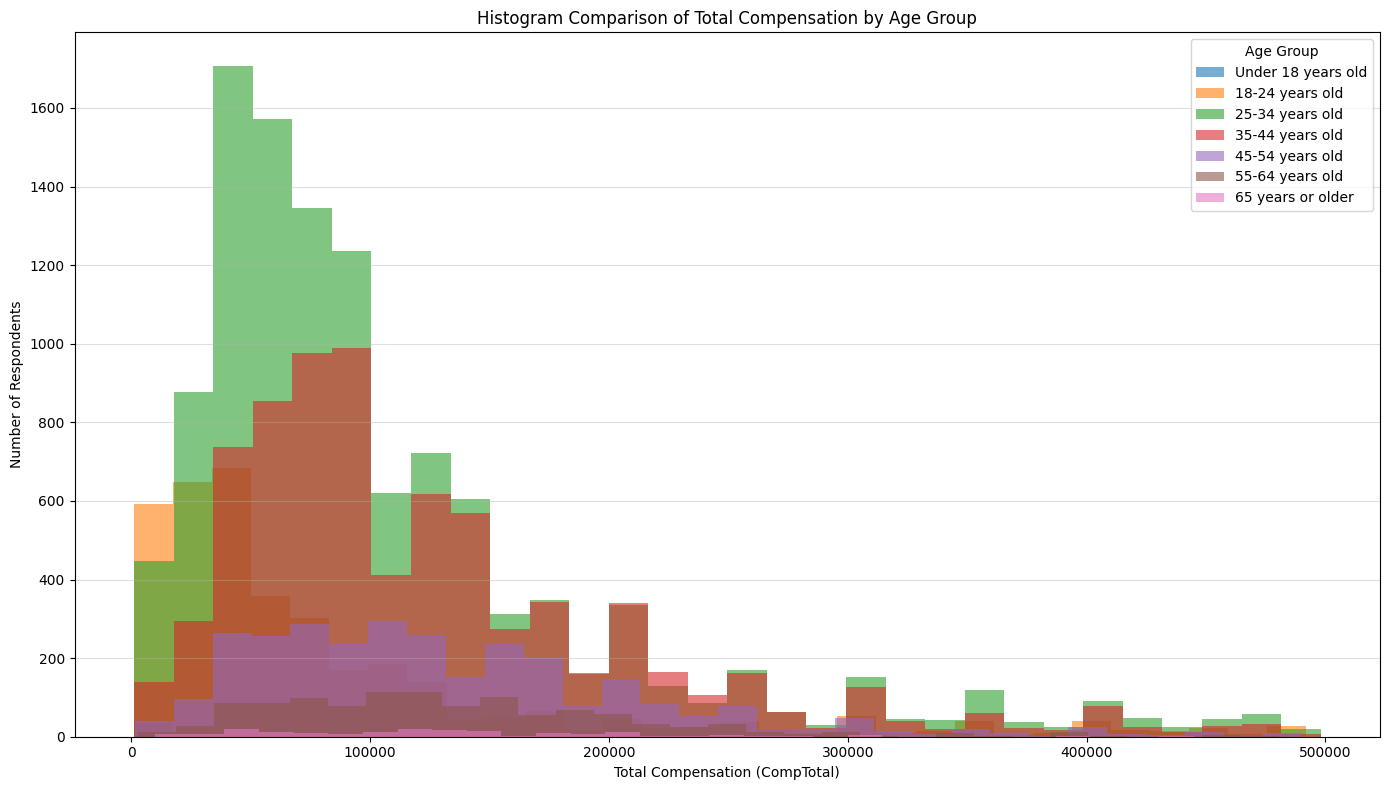

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query required columns
query = """
SELECT Age, CompTotal FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Filter to only keep common Age groups
age_groups = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_groups)]

# Step 4: Remove extreme outliers (optional, to make histograms clearer)
df = df[(df['CompTotal'] > 1000) & (df['CompTotal'] < 500000)]

# Step 5: Plot histograms by age group
plt.figure(figsize=(14, 8))

for age in age_groups:
    subset = df[df['Age'] == age]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.6, label=age)

plt.title("Histogram Comparison of Total Compensation by Age Group")
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.legend(title="Age Group")
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


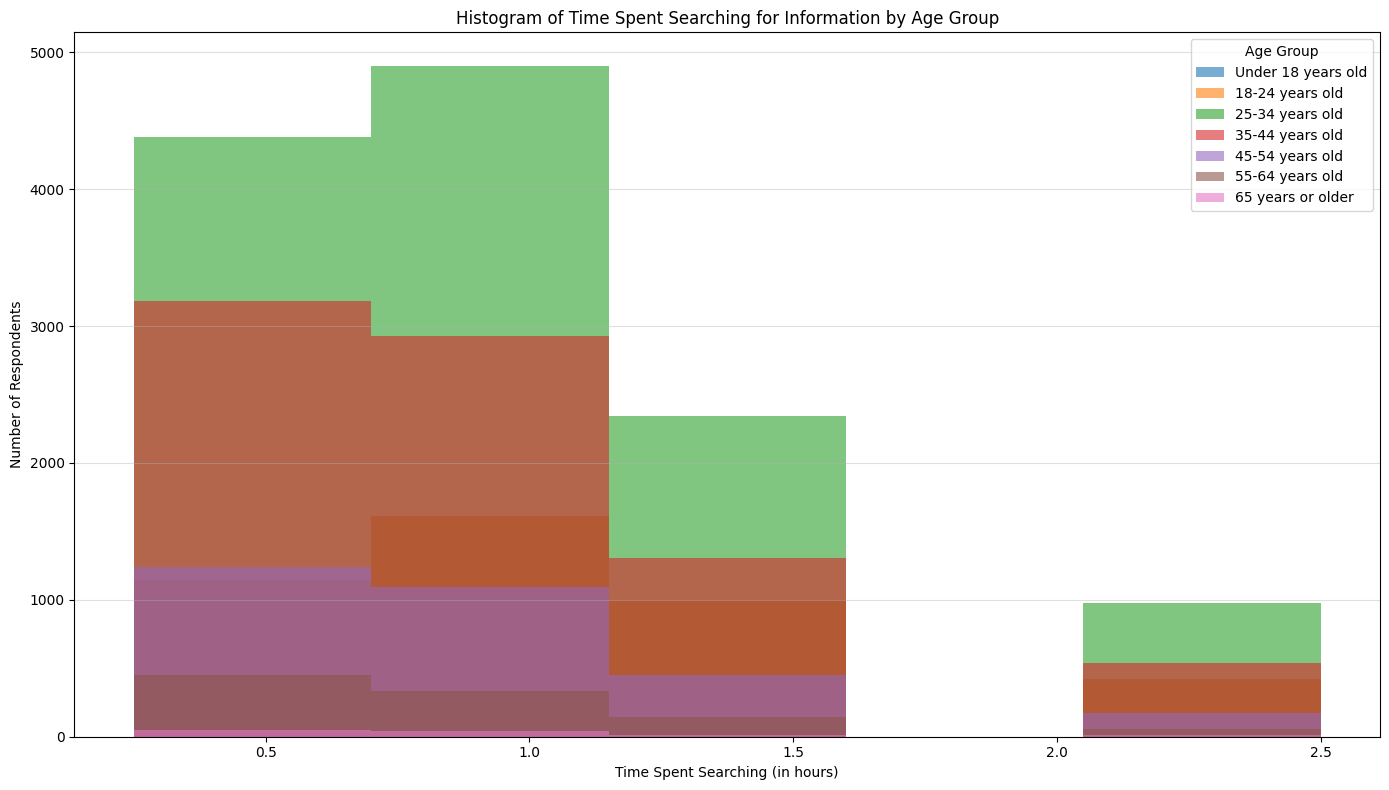

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite DB
conn = sqlite3.connect("survey-data.sqlite")

# Load age and TimeSearching columns
query = """
SELECT Age, TimeSearching FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Fix mapping based on actual dataset values
time_mapping = {
    "Less than 15 minutes a day": 0.25,
    "15-30 minutes a day": 0.5,
    "30-60 minutes a day": 0.75,
    "60-120 minutes a day": 1.5,
    "Over 120 minutes a day": 2.5
}

# Apply mapping
df["TimeSearchingNum"] = df["TimeSearching"].map(time_mapping)

# Drop NaNs (if any unmapped values exist)
df = df.dropna(subset=["TimeSearchingNum"])

# Filter known age groups
age_groups = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df["Age"].isin(age_groups)]

# Plot
plt.figure(figsize=(14, 8))

for age in age_groups:
    subset = df[df["Age"] == age]
    if not subset.empty:
        plt.hist(subset["TimeSearchingNum"], bins=5, alpha=0.6, label=age)

plt.title("Histogram of Time Spent Searching for Information by Age Group")
plt.xlabel("Time Spent Searching (in hours)")
plt.ylabel("Number of Respondents")
plt.legend(title="Age Group")
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


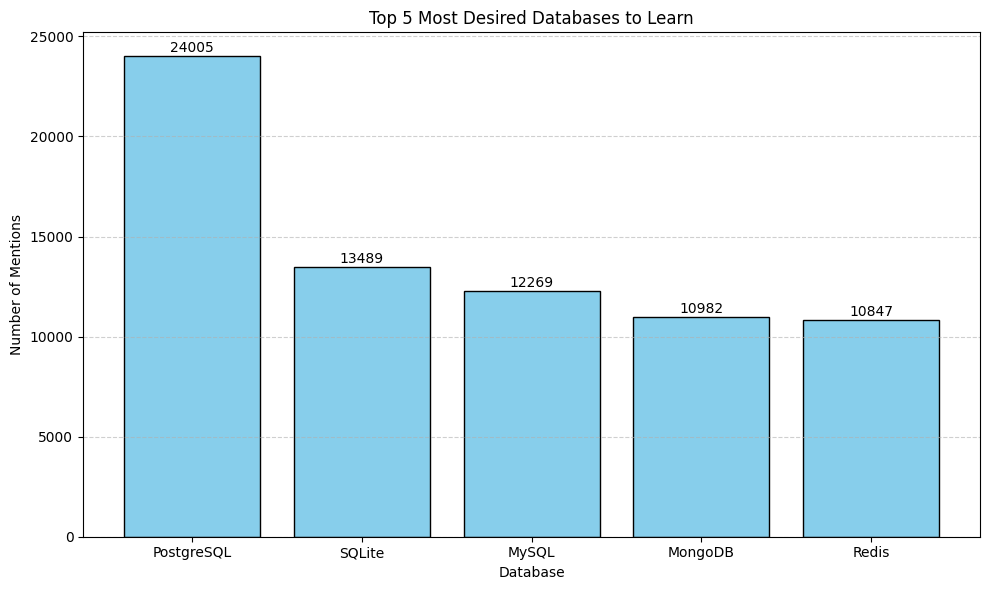

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from collections import Counter

# Step 1: Connect to DB and Load Desired Column
conn = sqlite3.connect("survey-data.sqlite")
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Extract all databases into a list
all_dbs = []
for row in df['DatabaseWantToWorkWith']:
    all_dbs.extend([db.strip() for db in row.split(';') if db.strip()])

# Step 3: Count frequency of each database
db_counter = Counter(all_dbs)
top5 = db_counter.most_common(5)

# Step 4: Prepare for plotting
labels, values = zip(*top5)

# Step 5: Plot histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.title("Top 5 Most Desired Databases to Learn")
plt.ylabel("Number of Mentions")
plt.xlabel("Database")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(height),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [ ]:
## Write your code here

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [ ]:
## Write your code here

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
